#### 有一名植物学爱好者对她发现的鸢尾花的品种很感兴趣
#### 她收集了每朵鸢尾花的一些测量数据：花瓣的长度和宽度以及花萼的长度和宽度，单位：厘米，她还有一些鸢尾花的测量数据，已经被植物学专家分类为setoa、versicolor或viginica三个品种之一，对于这些测量数据，她可以确定每朵鸢尾花所属品种
#### 目标：构建一个机器学习模型，可以从已知品种的鸢尾花测量数据中进行学习，从而能够预测鸢尾花的品种

In [2]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 调用load_iris函数来加载鸢尾花(Iris)数据集，这是机器学习和统计学中一个经典的数据集
from sklearn.datasets import load_iris

In [3]:
# iris_dataset返回一个bunch对象，里面包含键和值
iris_dataset = load_iris()
# 包含的键：['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
# DESCR键对应的是数据集的简要说明
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# target_names键对应的是一个字符串数组，里面包含要预测的花的品种
print("Target names:{}".format(iris_dataset['target_names']))

Target names:['setosa' 'versicolor' 'virginica']


In [6]:
# Feature_names键对应的值是一个字符串列表，对每一个特征进行了说明
# speal：花萼、petal：花瓣
print("Feature names:\n{}".format(iris_dataset['feature_names']))

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# data数据的每一行对应一朵花，列代表每朵花的四个测量数据
print("Type of data:{}".format(type(iris_dataset['data'])))
print("Type of data:{}".format(iris_dataset['data'].shape))
# 前5个样本的特征数值
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

Type of data:<class 'numpy.ndarray'>
Type of data:(150, 4)
First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [8]:
# target是一维数组，每朵花对应其中一个数据
print("Type of target:{}".format(type(iris_dataset['target'])))
print("Shape of target:{}".format(iris_dataset['target'].shape))

Type of target:<class 'numpy.ndarray'>
Shape of target:(150,)


In [9]:
# 品种被转换成从0到2的整数：0代表setosa、1代表versicolor、2代表virginica
print("Target:{}".format(iris_dataset['target']))

Target:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
# sklearn.model_selection里的train_test_split函数可以打乱数据集并进行拆分
# 这个函数将75%的行数据及对应标签作为训练集，剩下25%的数据及其标签作为测试集
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

X_train shape:(112, 4)
y_train shape:(112,)
X_test shape:(38, 4)
y_test shape:(38,)


E:\anaconda3\envs\TF_2C\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\envs\TF_2C\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\anaconda3\envs\TF_2C\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
E:\anaconda3\envs\TF_2C\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning

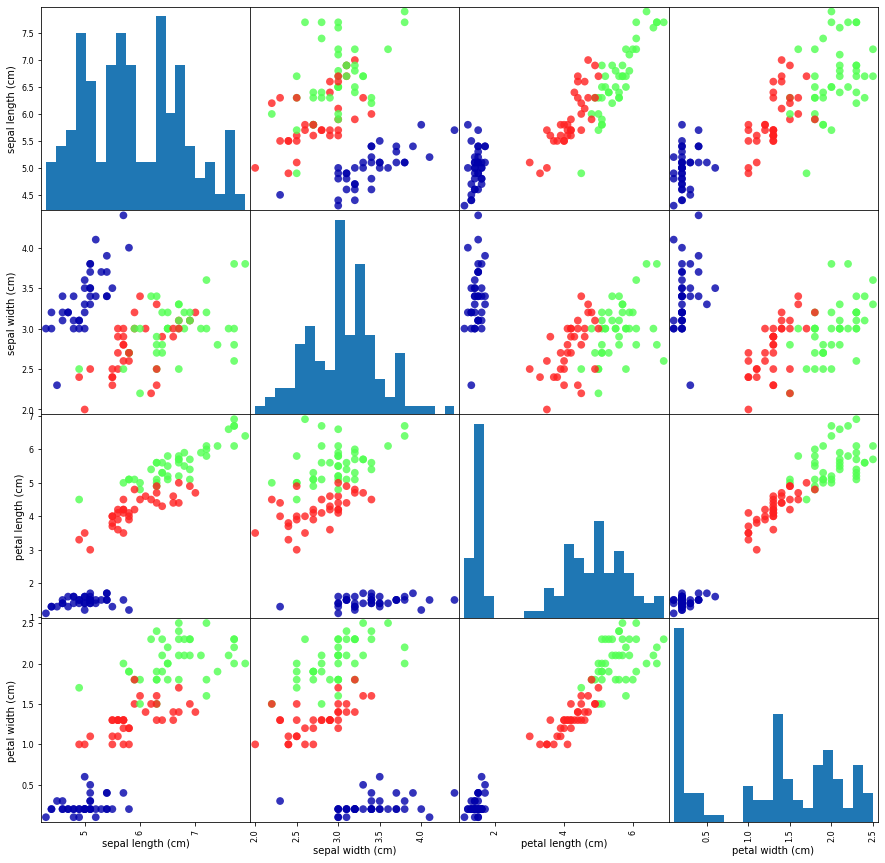

In [12]:
# 利用X_train中的数据创建DataFrame
# 利用iris_dataset.feature_names中的字符串对数据列进行标记
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 利用DataFrame创建散点图矩阵，按y_train着色
# figsize：以英寸为单位的图像大小，一般以元组(width,height)形式设置
# marker：matplotlib可用的标记类型，如：'.',',','o'等
# diagonnl：{{hist,ked}}，hist表示直方图，kde表示核密度估计
# hist_kwds：与hist相关的字典参数
# alpha：图像透明度，一般取(0,1]
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)
# 展示散点图矩阵
plt.show()

In [13]:
# k近邻分类器
# k近邻算法中k的含义是：我们可以考虑训练集中与新数据点最近的任意k个邻居，而不是只考虑最近的那一个，然后可以用这些邻居中数量最多的类别做出预测
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# 邻居数目设置为1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
# 输入新数据
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:{}".format(X_new.shape))

X_new.shape:(1, 4)


In [16]:
# 预测
prediction = knn.predict(X_new)
print("Prediction:{}".format(prediction))
print("Predicted target name:{}".format(iris_dataset['target_names'][prediction]))

Prediction:[0]
Predicted target name:['setosa']


In [17]:
# 评估模型
y_pred = knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))
print("Test seet score:{:.2f}".format(np.mean(y_pred == y_test)))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test seet score:0.97


#### 第一章代码如上
